# Get Actions and Definitions data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
#NE PAS MODIFIER CETTE CELL
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
#NE PAS MODIFIER CETTE CELL
actions = pd.read_csv('/content/drive/MyDrive/DATA/actions_test_enc.csv')
definitions = pd.read_csv('/content/drive/MyDrive/DATA/definitions_test_enc.csv')

# Definition types

In [ ]:
# IS NULL ?
definitions.isnull().values.any()

False

In [ ]:
# 164 EXHIBITORS
definitions['type'].value_counts()

user         22325
product        545
planning       312
exhibitor      164
Name: type, dtype: int64

# Get Exhibitors, Sponsors

In [ ]:
# MAKE EXHIBITOR TABLE
exhibitors = definitions.loc[definitions['type'] == 'exhibitor']

In [ ]:
# GET SPONSOR EXHIBITORS
exhibitors['properties'].value_counts()
exhibitors['sponsor'] = np.where(exhibitors['properties'] == '{{"sponsor": "True"}}', 1, 0)
exhibitors = exhibitors.rename(columns={"id": "exhibitor_id"})
exhibitors = exhibitors.drop(['type','properties'], axis=1)

# Count of Bookmarks, Show by exhibitor

In [ ]:
# ADD COUNT OF BOOKMARK ACTION BY EXHIBITOR
exhibitor_bookmark = actions[actions['type'] == "exhibitor_bookmark"]
exhibitor_bookmark['exhibitor_id'] = exhibitor_bookmark.apply(lambda x: json.loads(x['properties'])['exhibitor_id'],axis=1)
exhibitor_bookmark = exhibitor_bookmark.groupby(['exhibitor_id']).agg({'type':'count'})
exhibitor_bookmark = exhibitor_bookmark.rename(columns={"type": "user_nb_bookmark"})

# ADD COUNT OF SHOW ACTION BY EXHIBITOR
exhibitor_show = actions[actions['type'] == "exhibitor_show"]
exhibitor_show['exhibitor_id'] = exhibitor_show.apply(lambda x: json.loads(x['properties'])['exhibitor_id'],axis=1)
exhibitor_show = exhibitor_show.groupby(['exhibitor_id']).agg({'type':'count'})
exhibitor_show = exhibitor_show.rename(columns={"type": "user_nb_show"})

# CREATE EXHIBITIORS STATS DF
exhibitors_stats = pd.merge(exhibitors, exhibitor_bookmark, how='left', on='exhibitor_id')
exhibitors_stats = pd.merge(exhibitors_stats, exhibitor_show, how='left', on='exhibitor_id')
exhibitors_stats = exhibitors_stats.sort_values(by='user_nb_bookmark', ascending=False)

In [ ]:
# TOP 5 BOOKMARKED EXHIBITORS
exhibitors_stats.head()

,exhibitor_id,sponsor,user_nb_bookmark,user_nb_show
116,610bfbd5f30162a77caebfe7b707eb5a,1,924.0,5128.0
120,d4795d93a1ce30d3e48be9b2f854021e,1,824.0,4900.0
27,85ca2774311535be96e6fef6bfb07828,1,703.0,3607.0
46,96cac339c5a74f10a3c07486ad9b40aa,1,701.0,3788.0
62,b9d0e24fcb8ac623920c4387317e618d,0,629.0,2525.0


In [ ]:
# IS NA ?
exhibitors_stats.isna()

,exhibitor_id,sponsor,user_nb_bookmark,user_nb_show
116,False,False,False,False
120,False,False,False,False
27,False,False,False,False
46,False,False,False,False
62,False,False,False,False
...,...,...,...,...
107,False,False,False,False
162,False,False,False,False
143,False,False,False,False
154,False,False,True,False


In [ ]:
# FILL NA
exhibitors_stats = exhibitors_stats.fillna(0)

# Correlation between Sponsor, Bookmark, Show

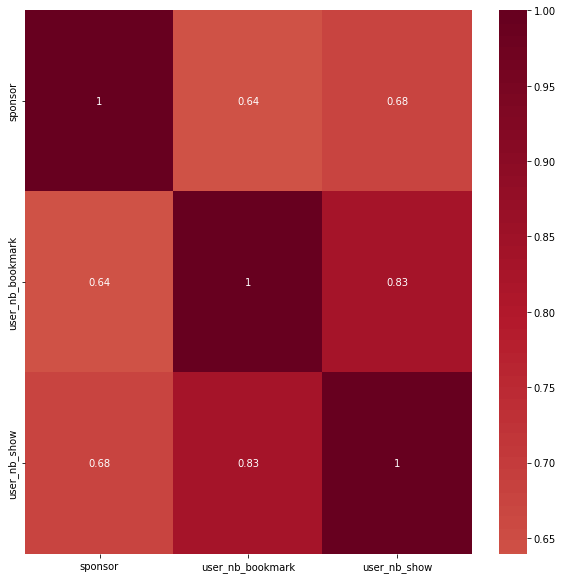

In [ ]:
# CORRELATION BETWEEN SPONSOR, NB BOOKMARK, NB SHOW
plt.figure(figsize=(10,10))
sns.heatmap(exhibitors_stats.corr(), annot=True, cmap='RdBu_r', center=0)

Text(0.5, 1.0, 'Bookmark and Exhibitor Show')

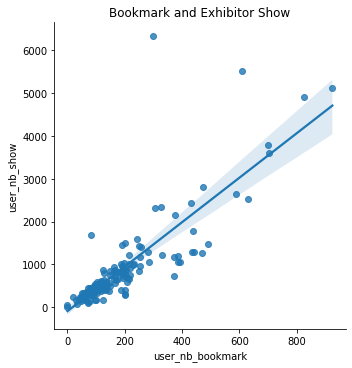

In [ ]:
# EXHIBITOR BOOKMARK AND EXHIBITOR SHOW
sns.lmplot(x='user_nb_bookmark', y='user_nb_show', data=exhibitors_stats)
plt.title("Bookmark and Exhibitor Show")

In [ ]:
# PEARSON CORRELATION TEST BETWEEN USER_NB_BOOKMARK AND NB_SHOW
# DISPLAY THE COEFF AND THE P-VALUE OF THE TEST
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(exhibitors_stats['user_nb_bookmark'],exhibitors_stats['user_nb_show']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

,resultat_test
pearson_coeff,8.318162e-01
p-value,2.865968e-43


In [ ]:
np.corrcoef(exhibitors_stats['user_nb_bookmark'], exhibitors_stats['user_nb_show'])

array([[1.        , 0.83181616],
       [0.83181616, 1.        ]])